In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
import seaborn as sn
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression

In [2]:
# Step 1: Data Pre-processing
# Load the dataset
#cols = ['ID', LIMIT_BAL	SEX	EDUCATION	MARRIAGE	AGE	PAY_0	PAY_2	PAY_3	PAY_4	...	BILL_AMT4	BILL_AMT5	BILL_AMT6	PAY_AMT1	PAY_AMT2	PAY_AMT3	PAY_AMT4	PAY_AMT5	PAY_AMT6	default payment next month]
df = pd.read_csv('creditcard.csv')
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Preparing My Dataset

0    23364
1     6636
Name: default payment next month, dtype: int64
0    23364
1     6636
Name: default payment next month, dtype: int64


C:\Users\dammi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


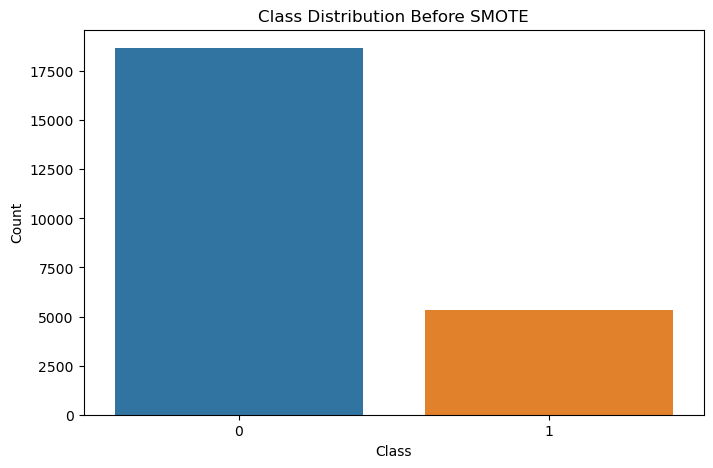

C:\Users\dammi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


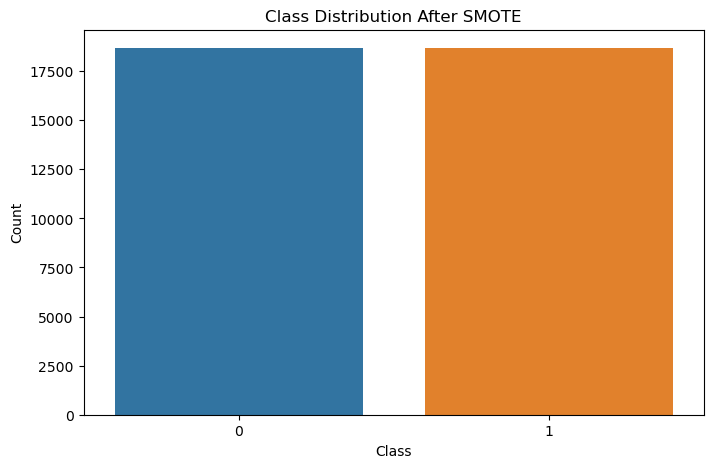

Number of outliers removed: 0


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Check the class distribution
print(data['default payment next month'].value_counts())
# Check the class distribution
print(data['default payment next month'].value_counts())

# Split the dataset into features and labels
X = data.drop('default payment next month', axis=1).values
y = data['default payment next month'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Handling class imbalance
# Separate the features (X) and target variable (y)
dataframe_no_outliers = df[df['default payment next month'].notna()]
if 'default payment next month' in dataframe_no_outliers.columns:
    X = dataframe_no_outliers.drop(columns=['default payment next month'])
    y = dataframe_no_outliers['default payment next month']

      
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Plot class distribution before SMOTE
plt.figure(figsize=(8, 5))
sns.countplot(y_train)
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Perform SMOTE on the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Plot class distribution after SMOTE
plt.figure(figsize=(8, 5))
sns.countplot(y_train_resampled)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Apply feature selection using PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_resampled)



# Print the number of removed outliers
num_outliers_removed = len(df['default payment next month']) - len(dataframe_no_outliers)
print(f"Number of outliers removed: {num_outliers_removed}")


# Decision Tree

Accuracy: 0.7265
Precision: 0.384016973125884
Recall: 0.4135567402894136
Decision Tree F1-score: 0.39823982398239827
Decision Tree ROC AUC: 0.6138617923764115


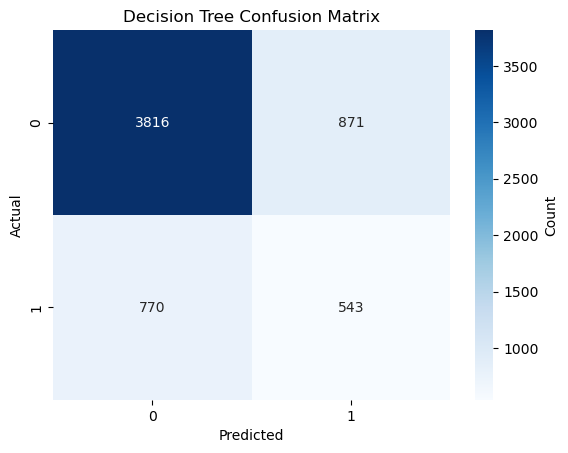

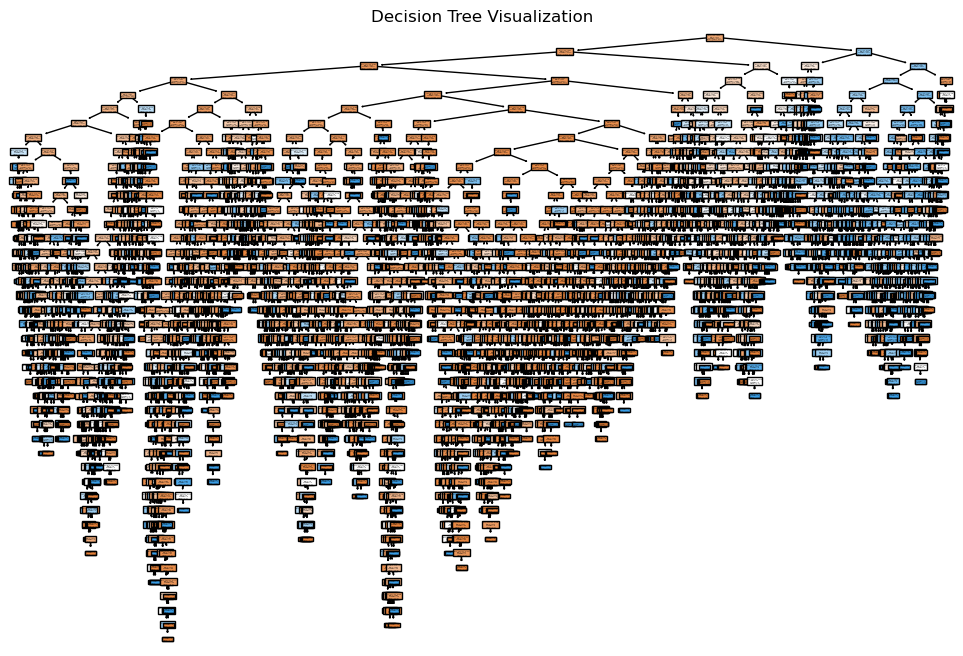

In [4]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the decision tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
dt_f1 = f1_score(y_test, y_pred)
dt_roc_auc = roc_auc_score(y_test, y_pred)

#print the evaluation metrix
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print('Decision Tree F1-score:', dt_f1)
print('Decision Tree ROC AUC:', dt_roc_auc)

# Plot Decision Tree Confusion Metrix
plt.figure()
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot Decision Tree Visualization
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=data.columns[:-1])
plt.title('Decision Tree Visualization')
plt.show()



# Random Forest

Accuracy: 0.8128333333333333
Precision: 0.6301369863013698
Recall: 0.3503427265803503
Random Forest F1-score: 0.45031815956926086
Random Forest ROC AUC: 0.6463682909624602


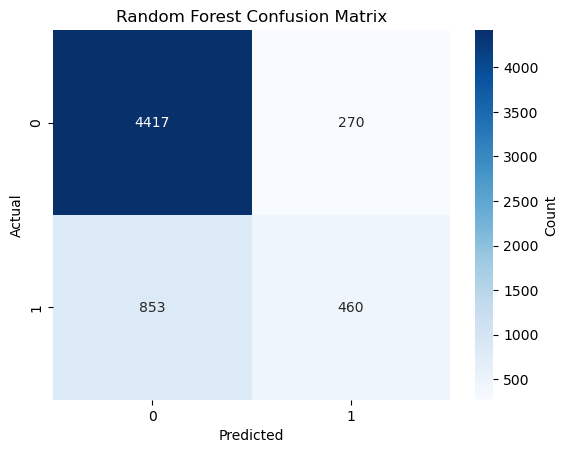

In [5]:
# Create and train the Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)
rf_roc_auc = roc_auc_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print('Random Forest F1-score:', rf_f1)
print('Random Forest ROC AUC:', rf_roc_auc)

# Plot Random Forest Confusion Matrix
plt.figure()
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



# Support Vector Machine

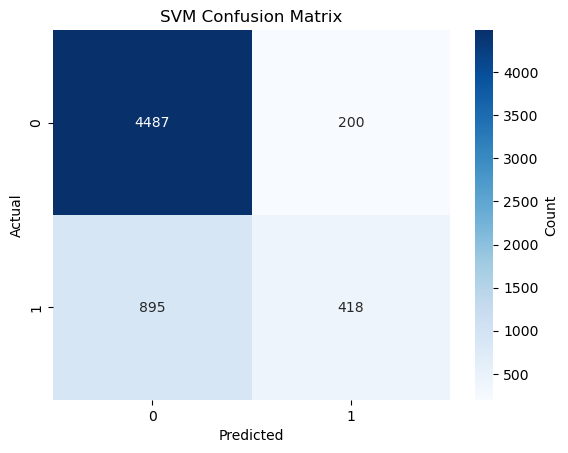

SVM Accuracy: 0.8175
SVM Precision: 0.6763754045307443
SVM Recall: 0.31835491241431835
SVM F1-score: 0.432936302433972
SVM ROC AUC: 0.6378418470755185


In [47]:
# Support Vector Machine
svm = SVC()
svm.fit(X_train_scaled, y_train)
svm_predictions = svm.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions)
svm_roc_auc = roc_auc_score(y_test, svm_predictions)

# Plot SVM Confusion Matrix
plt.figure()
ax = sns.heatmap(confusion_matrix(y_test, svm_predictions), annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print the evaluation metrics
print('SVM Accuracy:', svm_accuracy)
print('SVM Precision:', svm_precision)
print('SVM Recall:', svm_recall)
print('SVM F1-score:', svm_f1)
print('SVM ROC AUC:', svm_roc_auc)

# K-Nearest Neighbors (KNN)

In [11]:
# Step 1: Data Pre-processing
# Load the dataset
df = pd.read_csv('creditcard.csv')

# Handle missing values (if any)
df.fillna(df.mean(), inplace=True)

# Encode categorical variables (if any)
df = pd.get_dummies(df, columns=['SEX', 'EDUCATION', 'MARRIAGE'])

# Split the dataset into features and labels
X = df.drop('default payment next month', axis=1).values
y = df['default payment next month'].values

# Split the dataset into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

from sklearn.tree import plot_tree
# Handle missing values (if any)
df.fillna(df.mean(), inplace=True)

# Split the dataset into features and labels
X = df.drop('default payment next month', axis=1).values
y = df['default payment next month'].values

# Split the dataset into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

C:\Users\dammi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


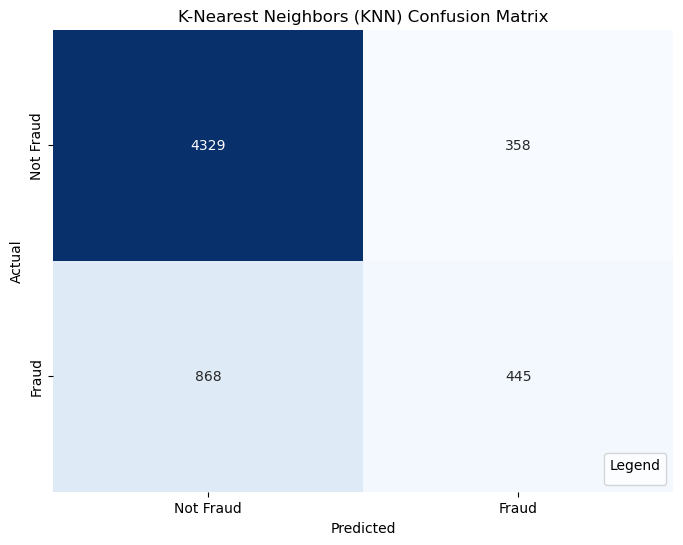

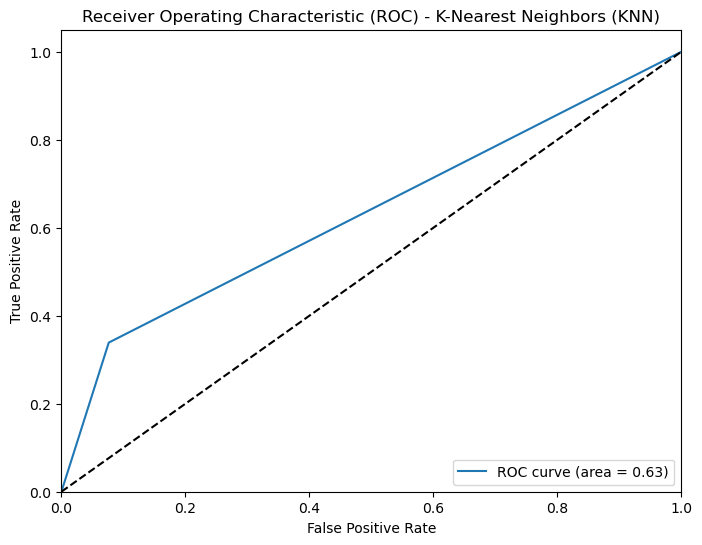

K-Nearest Neighbors (KNN) Accuracy: 0.7956666666666666
K-Nearest Neighbors (KNN) Precision: 0.5541718555417185
K-Nearest Neighbors (KNN) Recall: 0.3389185072353389
K-Nearest Neighbors (KNN) F1-score: 0.4206049149338374
K-Nearest Neighbors (KNN) ROC AUC: 0.6312685132720326


In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn_predictions = knn.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)
knn_f1 = f1_score(y_test, knn_predictions)
knn_roc_auc = roc_auc_score(y_test, knn_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, knn_predictions), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('K-Nearest Neighbors (KNN) Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Add custom legend
class_names = ['Not Fraud', 'Fraud']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks + 0.5, class_names, ha='center')
plt.yticks(tick_marks + 0.5, class_names, va='center')
plt.legend(title='Legend', labels=['True Negative', 'False Positive', 'False Negative', 'True Positive'], loc='lower right')

plt.show()


# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, knn_predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - K-Nearest Neighbors (KNN)')
plt.legend(loc="lower right")
plt.show()

# Print the evaluation metrics

print('K-Nearest Neighbors (KNN) Accuracy:', knn_accuracy)
print('K-Nearest Neighbors (KNN) Precision:', knn_precision)
print('K-Nearest Neighbors (KNN) Recall:', knn_recall)
print('K-Nearest Neighbors (KNN) F1-score:', knn_f1)
print('K-Nearest Neighbors (KNN) ROC AUC:', knn_roc_auc)


# Logistic Regression

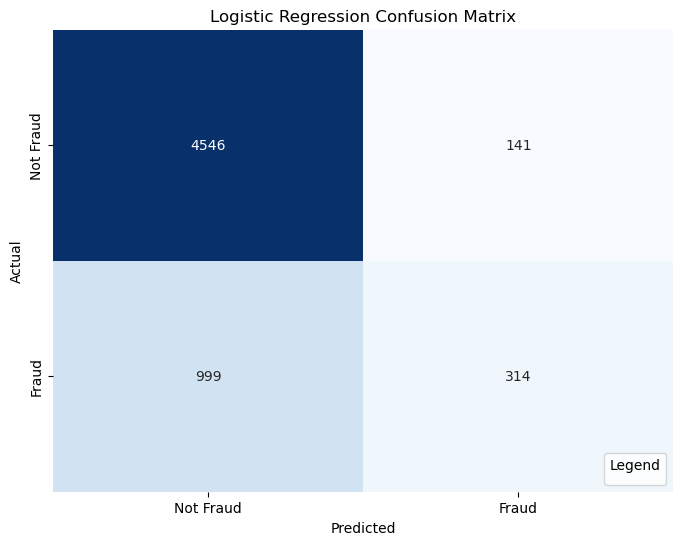

Logistic Regression Accuracy: 0.81
Logistic Regression Precision: 0.6901098901098901
Logistic Regression Recall: 0.23914699162223915
Logistic Regression F1-score: 0.3552036199095023
Logistic Regression ROC AUC: 0.6045318913733128


In [66]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
lr_predictions = lr.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)
lr_f1 = f1_score(y_test, lr_predictions)
lr_roc_auc = roc_auc_score(y_test, lr_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, lr_predictions), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
class_names = ['Not Fraud', 'Fraud']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks + 0.5, class_names, ha='center')
plt.yticks(tick_marks + 0.5, class_names, va='center')
plt.legend(title='Legend', labels=['True Negative', 'False Positive', 'False Negative', 'True Positive'], loc='lower right')
plt.show()


# Print the evaluation metrics

print('Logistic Regression Accuracy:', lr_accuracy)
print('Logistic Regression Precision:', lr_precision)
print('Logistic Regression Recall:', lr_recall)
print('Logistic Regression F1-score:', lr_f1)
print('Logistic Regression ROC AUC:', lr_roc_auc)


In [ ]:
# Plot Coefficient Magnitudes for Logistic Regression
coefs = lr.coef_[0]
features = data.drop('default payment next month', axis=1).columns
sorted_indices = np.argsort(np.abs(coefs))
plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), np.abs(coefs[sorted_indices]))
plt.yticks(range(len(features)), features[sorted_indices])
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Features')
plt.title('Logistic Regression Coefficient Magnitudes')
plt.show() 

C:\Users\dammi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


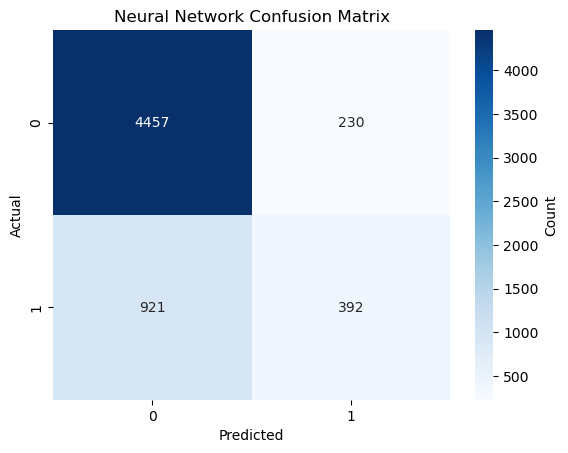

Neural Network Accuracy: 0.8081666666666667
Neural Network Precision: 0.6302250803858521
Neural Network Recall: 0.2985529322162985
Neural Network F1-score: 0.4051679586563307
Neural Network ROC AUC: 0.6247405156067625


In [14]:
# Neural Networks
nn = MLPClassifier()
nn.fit(X_train_scaled, y_train)
nn_predictions = nn.predict(X_test_scaled)
nn_accuracy = accuracy_score(y_test, nn_predictions)
nn_precision = precision_score(y_test, nn_predictions)
nn_recall = recall_score(y_test, nn_predictions)
nn_f1 = f1_score(y_test, nn_predictions)
nn_roc_auc = roc_auc_score(y_test, nn_predictions)

plt.figure()
ax = sns.heatmap(confusion_matrix(y_test, nn_predictions), annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
plt.title('Neural Network Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print the evaluation metrics
print('Neural Network Accuracy:', nn_accuracy)
print('Neural Network Precision:', nn_precision)
print('Neural Network Recall:', nn_recall)
print('Neural Network F1-score:', nn_f1)
print('Neural Network ROC AUC:', nn_roc_auc)


# ROC Curves

C:\Users\dammi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dammi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


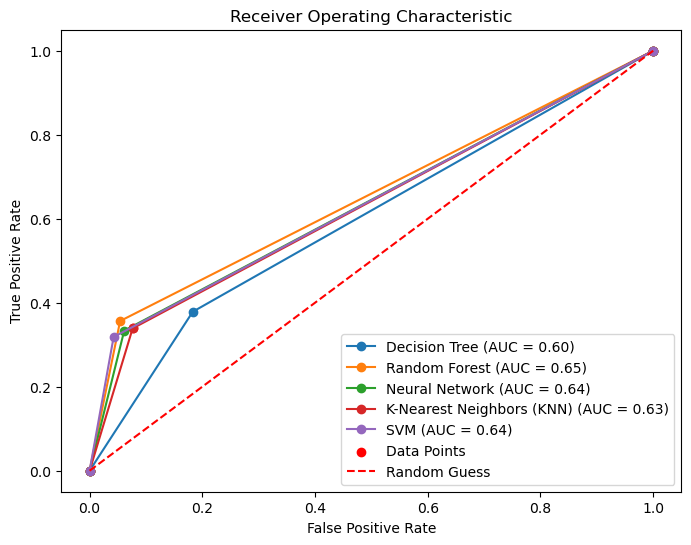

In [49]:
# Plot ROC curves
plt.figure(figsize=(8, 6))

# Decision Tree
X = data.drop('default payment next month', axis=1).values
y = data['default payment next month'].values

# Split the dataset into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_scaled, y_train)
dt_predictions = decision_tree.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)
dt_f1 = f1_score(y_test, dt_predictions)
dt_roc_auc = roc_auc_score(y_test, dt_predictions)


dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_predictions)
dt_roc_auc = auc(dt_fpr, dt_tpr)
plt.plot(dt_fpr, dt_tpr, 'o-', label='Decision Tree (AUC = %0.2f)' % dt_roc_auc)

# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train_scaled, y_train)
rf_predictions = random_forest.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)
rf_roc_auc = roc_auc_score(y_test, rf_predictions)


rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_predictions)
rf_roc_auc = auc(rf_fpr, rf_tpr)
plt.plot(rf_fpr, rf_tpr, 'o-', label='Random Forest (AUC = %0.2f)' % rf_roc_auc)


# Neural Network
nn = MLPClassifier()
nn.fit(X_train_scaled, y_train)
nn_predictions = nn.predict(X_test_scaled)
nn_accuracy = accuracy_score(y_test, nn_predictions)
nn_precision = precision_score(y_test, nn_predictions)
nn_recall = recall_score(y_test, nn_predictions)
nn_f1 = f1_score(y_test, nn_predictions)
nn_roc_auc = roc_auc_score(y_test, nn_predictions)
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_predictions)
nn_roc_auc = auc(nn_fpr, nn_tpr)
plt.plot(nn_fpr, nn_tpr, 'o-', label='Neural Network (AUC = %0.2f)' % nn_roc_auc)


# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn_predictions = knn.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)
knn_f1 = f1_score(y_test, knn_predictions)
knn_roc_auc = roc_auc_score(y_test, knn_predictions)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_predictions)
knn_roc_auc = auc(knn_fpr, knn_tpr)
plt.plot(knn_fpr, knn_tpr, 'o-', label='K-Nearest Neighbors (KNN) (AUC = %0.2f)' % knn_roc_auc)


# SVM
svm = SVC()
svm.fit(X_train_scaled, y_train)
svm_predictions = svm.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions)
svm_roc_auc = roc_auc_score(y_test, svm_predictions)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_predictions)
svm_roc_auc = auc(svm_fpr, svm_tpr)
plt.plot(svm_fpr, svm_tpr, 'o-', label='SVM (AUC = %0.2f)' % svm_roc_auc)


# Add data points
plt.scatter(knn_fpr, knn_tpr, c='red', label='Data Points')

plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
